In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [6]:
train_df = train_df.set_index('Id')
test_df = test_df.set_index('Id')

In [7]:
test_df_id = test_df.index
test_df_id

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [8]:
train_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
all_data_df = pd.concat((train_df, test_df))
all_data_df.tail(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [11]:
len(all_data_df.columns)

80

<AxesSubplot:>

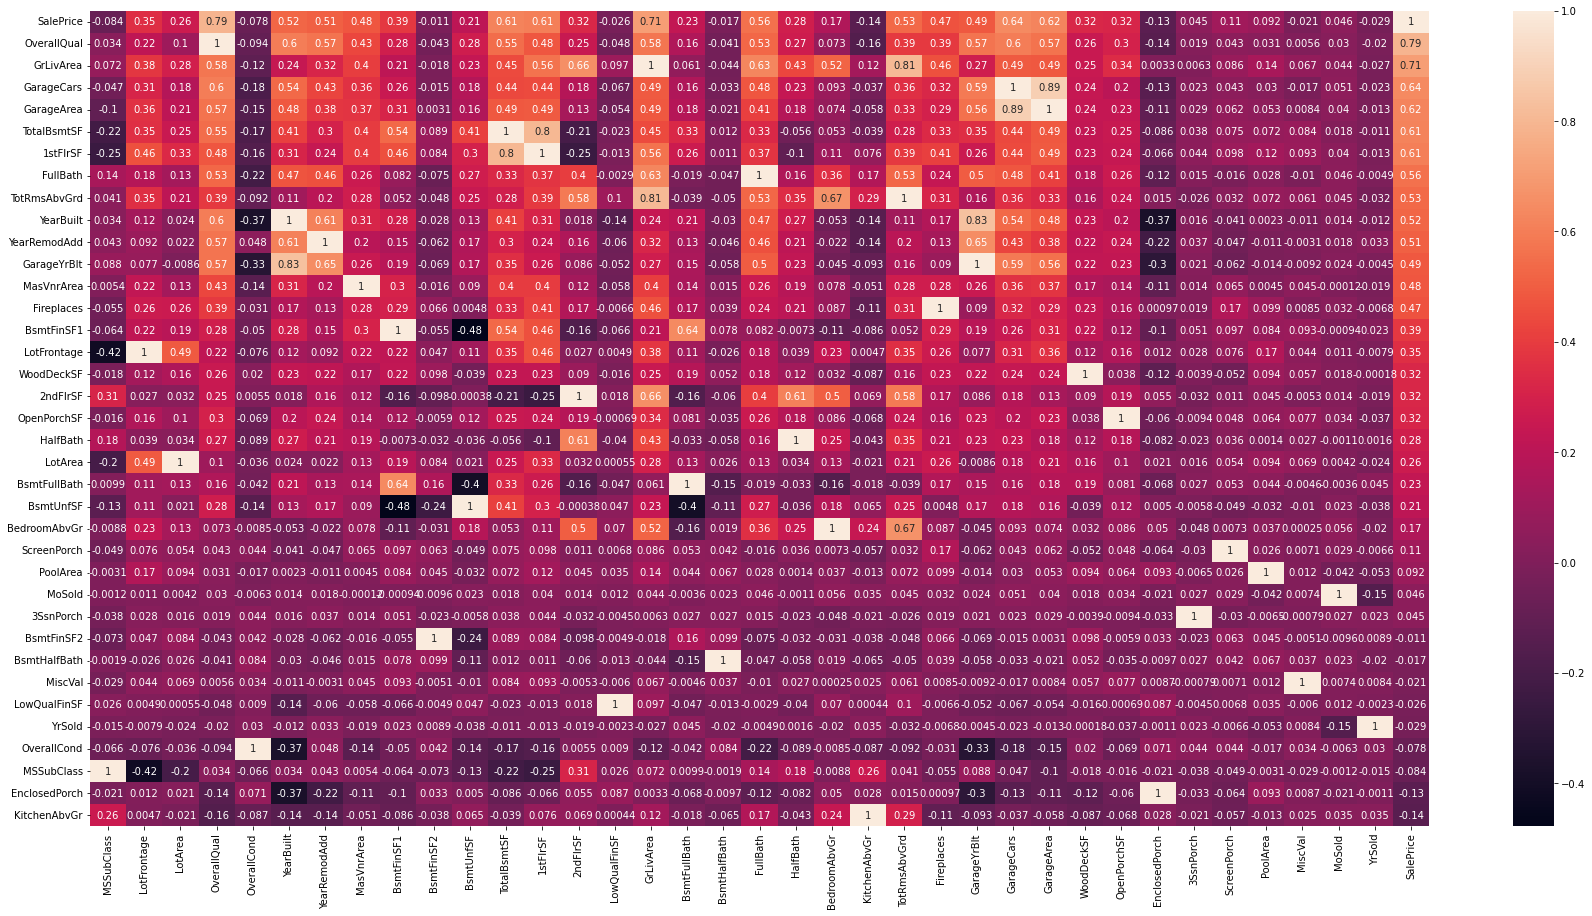

In [12]:
plt.subplots(figsize=(30, 15))
sns.heatmap(all_data_df.corr().sort_values(by = 'SalePrice', ascending=False), annot=True)

## outlier 제거

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

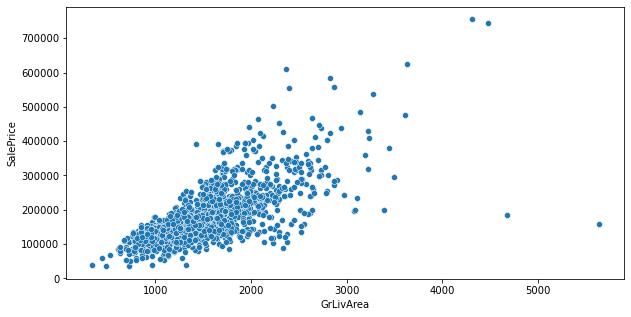

In [13]:
plt.subplots(figsize=(10, 5))
sns.scatterplot(data=all_data_df, x='GrLivArea', y='SalePrice')

In [14]:
# all_data_df = all_data_df.drop(all_data_df[(all_data_df['GrLivArea'] > 4000) & (all_data_df['SalePrice'] < 300000)].index)
# len(all_data_df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

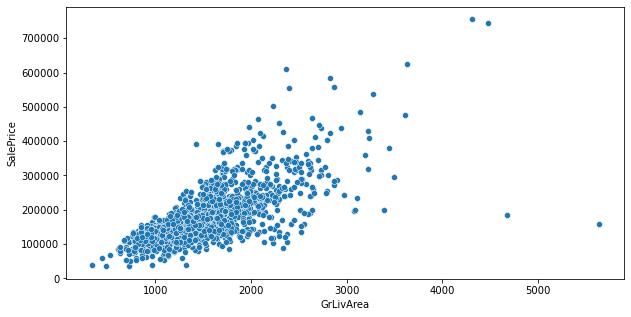

In [15]:
plt.subplots(figsize=(10, 5))
sns.scatterplot(data=all_data_df, x='GrLivArea', y='SalePrice')

## 결측치 제거 및 채우기

In [16]:
missing_df = pd.DataFrame(all_data_df.isnull().sum().sort_values(ascending=False)/len(all_data_df), columns=['percentage'])
missing_df[missing_df['percentage'] > 0]

,percentage
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
SalePrice,0.499829
FireplaceQu,0.486468
LotFrontage,0.166495
GarageCond,0.054471
GarageFinish,0.054471
GarageQual,0.054471


> 80% 이상인 결측치들은 제거

In [17]:
drop_list = missing_df['percentage'][missing_df['percentage'] > 0.8].index
all_data_df = all_data_df.drop(drop_list, axis=1)

In [18]:
pd.DataFrame(all_data_df.isnull().sum().sort_values(ascending = False) / len(all_data_df), columns=['Missing_percent'])

,Missing_percent
SalePrice,0.499829
FireplaceQu,0.486468
LotFrontage,0.166495
GarageCond,0.054471
GarageYrBlt,0.054471
...,...
CentralAir,0.000000
1stFlrSF,0.000000
2ndFlrSF,0.000000
LowQualFinSF,0.000000


## 상관계수 낮은 거 제거 (절대값이 0.1)

<AxesSubplot:>

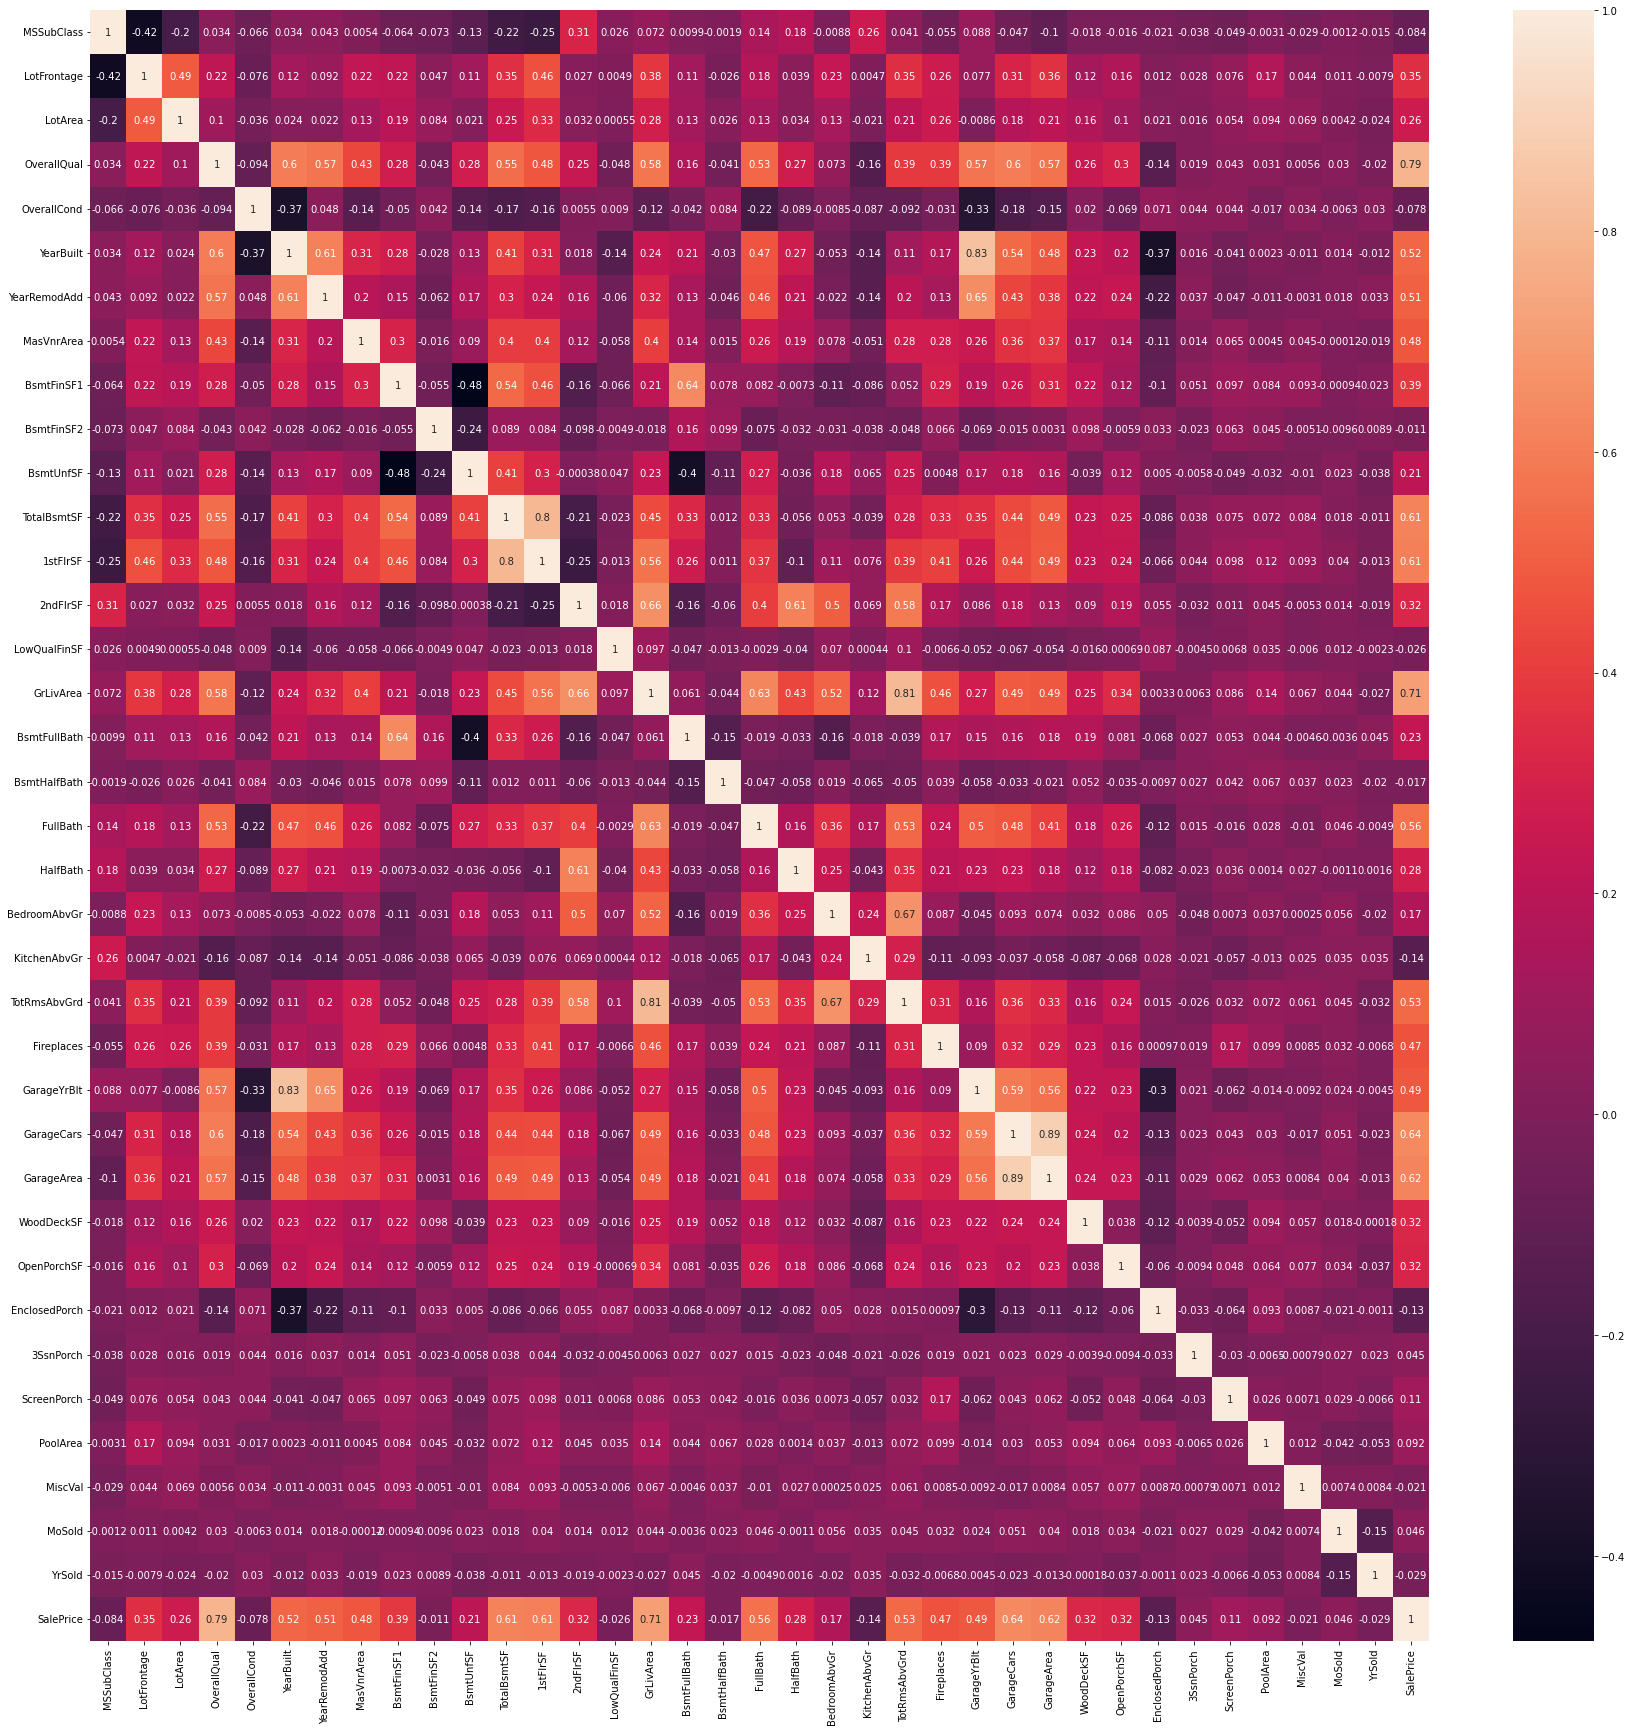

In [19]:
plt.subplots(figsize=(30, 30))
sns.heatmap(all_data_df.corr(), annot = True)

In [20]:
all_data_df.corr()[abs(all_data_df.corr()['SalePrice']) < 0.1].index

Index(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [21]:
low_cor_feature_list = all_data_df.corr()[abs(all_data_df.corr()['SalePrice']) < 0.1].index.to_list()
low_cor_feature_list

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [22]:
all_data_df = all_data_df.drop(low_cor_feature_list, axis = 1)
len(all_data_df.columns)

66

## 결측치 관계 파악 및 description을 통해 채우기

<AxesSubplot:>

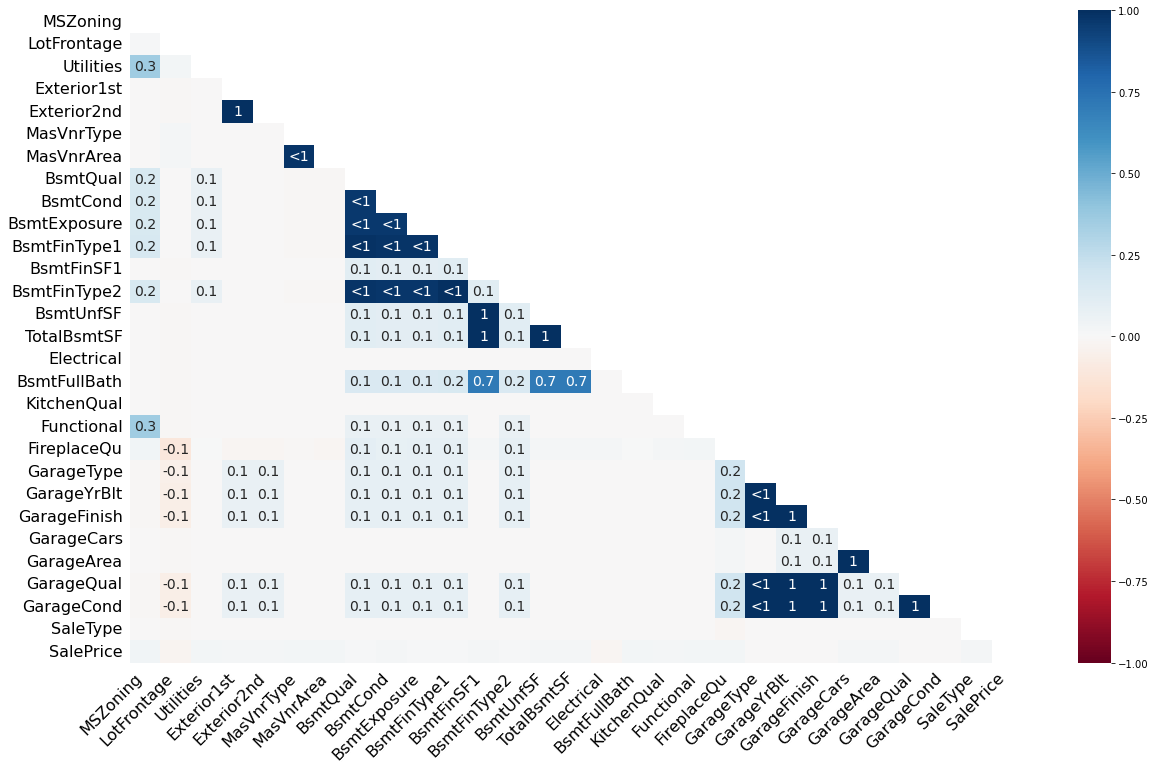

In [23]:
msno.heatmap(all_data_df)

Exterior2nd - Exterior1st -> 1  
MasVnrArea - MasVnrType -> -1  
BsmtCond - BsmtQual -> -1  
BsmtExposure - BsmtQual -> -1  
BsmtExposure - BsmtCond -> -1  
BsmtFinType1 - BsmtQual, BsmtCond, BsmtExposure -> -1  
BsmtFinType2 - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 -> -1  
BsmtUnfSF - BsmtFinSF1 -> 1  
TotalBsmtSF - BsmtFinSF1, BsmtUnfSF -> 1  
GarageYrBlt, GarageFinish, GarageQual, GarageCond  - GarageType -> -1  
GarageFinish, GarageYrBlt, GarageQual, GarageCond -> 1  
GarageArea - GarageCars -> -1  
GarageCond - GarageQual -> 1  

utilities는 값이 너무 몰려있으므로 drop

In [24]:
# drop이 마땅해보임
all_data_df['Utilities'].value_counts() / len(all_data_df['Utilities'])

AllPub    0.998972
NoSeWa    0.000343
Name: Utilities, dtype: float64

In [25]:
all_data_df = all_data_df.drop(['Utilities'], axis= 1)

Exterior(exterior covering on house)에 관해서 없는 값은 가장 일반적인 값으로 채워준다

In [26]:
all_data_df['Exterior1st'] = all_data_df['Exterior1st'].fillna(all_data_df['Exterior1st'].mode()[0])
all_data_df['Exterior2nd'] = all_data_df['Exterior2nd'].fillna(all_data_df['Exterior2nd'].mode()[0])

Masonry veneer에 관한 결측에 대해서는 NaN은 None이고 square feet에 대해서는 없기 때문에 0이라는 것을 알 수 있음

In [27]:
all_data_df['MasVnrType'].value_counts() / len(all_data_df['MasVnrType'])

None       0.596780
BrkFace    0.301131
Stone      0.085303
BrkCmn     0.008565
Name: MasVnrType, dtype: float64

In [28]:
all_data_df["MasVnrType"] = all_data_df["MasVnrType"].fillna("None")
all_data_df["MasVnrArea"] = all_data_df["MasVnrArea"].fillna(0)

Basement에 관해선 해당 없으면 NaN값이므로 None 및 0으로 채워준다

In [29]:
for col in ('BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath'):
    all_data_df[col] = all_data_df[col].fillna(0)


for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data_df[col] = all_data_df[col].fillna('None')

functional부분은 젤 흔한걸루 채운다 -> Typ가 너무 많은데 분포를 보고 결정 -> drop하는 것이 좋을 것으로 보임

In [30]:
all_data_df['Functional'].value_counts() / len(all_data_df['Functional'])

Typ     0.930798
Min2    0.023981
Min1    0.022268
Mod     0.011990
Maj1    0.006509
Maj2    0.003083
Sev     0.000685
Name: Functional, dtype: float64

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

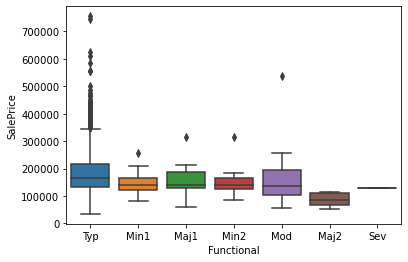

In [31]:
sns.boxplot(data=all_data_df, x='Functional', y= 'SalePrice')

In [32]:
all_data_df = all_data_df.drop('Functional', axis= 1)

FirePlaceQual은 NaN은 없는 것이기 때문에 None으로 채운다 -> 결측치가 50% 이상이므로 None으로 채운 뒤 분포 확인

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

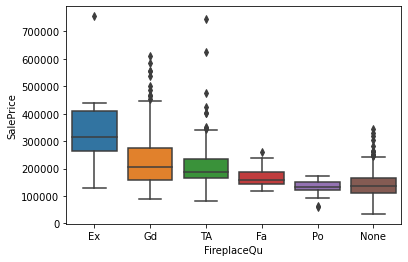

In [33]:
all_data_df['FireplaceQu'] = all_data_df['FireplaceQu'].fillna('None')

sns.boxplot(data= all_data_df, x= 'FireplaceQu', y='SalePrice', 
            order=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'])

Garage같은 경우엔 없으면 None, 0으로 채워준다

In [34]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data_df[col] = all_data_df[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data_df[col] = all_data_df[col].fillna(0)

결측치 확인 후 나머지도 채워준다

In [35]:
all_data_df.isnull().sum()[all_data_df.isnull().sum() > 0].sort_values(ascending = False) 

SalePrice      1459
LotFrontage     486
MSZoning          4
Electrical        1
KitchenQual       1
SaleType          1
dtype: int64

LotFrontage는 부동산과 연결된 거리의 linear feet이기 때문에 없는건 해당 동네로 묶은 뒤 가운데 값으로 채워준다

In [36]:
all_data_df['LotFrontage'] = all_data_df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

MSZoning에 대해서는 가장 많은 걸로 채움

In [37]:
all_data_df['MSZoning'].value_counts() / len(all_data_df['MSZoning'])

RL         0.775951
RM         0.157588
FV         0.047619
RH         0.008907
C (all)    0.008565
Name: MSZoning, dtype: float64

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

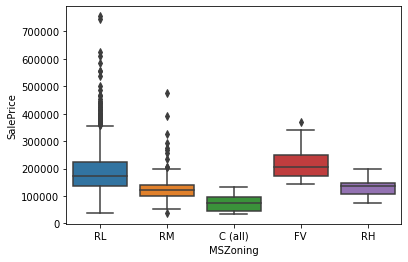

In [38]:
sns.boxplot(data= all_data_df, x= 'MSZoning', y='SalePrice')

In [39]:
all_data_df['MSZoning'] = all_data_df['MSZoning'].fillna(all_data_df['MSZoning'].mode()[0])

Electrical은 가장 많은 걸로 채운다

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

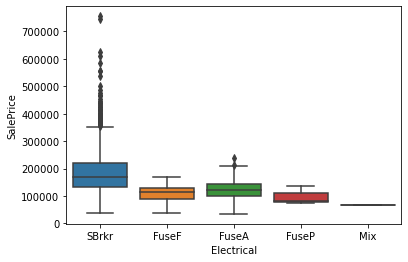

In [40]:
sns.boxplot(data= all_data_df, x= 'Electrical', y='SalePrice')

In [41]:
all_data_df['Electrical'] = all_data_df['Electrical'].fillna(all_data_df['Electrical'].mode()[0])

KitchenQual은 가장 흔한걸로 채운다

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

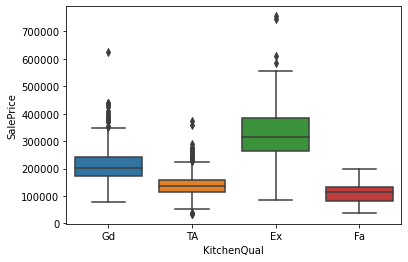

In [42]:
sns.boxplot(data= all_data_df, x= 'KitchenQual', y='SalePrice')

In [43]:
all_data_df['KitchenQual'] = all_data_df['KitchenQual'].fillna(all_data_df['KitchenQual'].mode()[0])

SaleType은 가장 흔한걸로 채운다

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

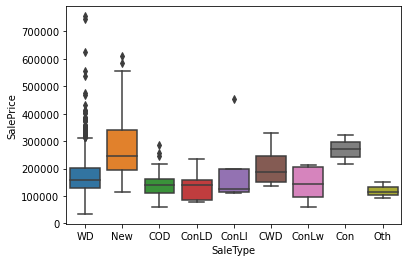

In [44]:
sns.boxplot(data= all_data_df, x= 'SaleType', y='SalePrice')

In [45]:
all_data_df['SaleType'] = all_data_df['SaleType'].fillna(all_data_df['SaleType'].mode()[0])

In [46]:
all_data_df.isnull().sum()[all_data_df.isnull().sum() > 0].sort_values(ascending = False) 

SalePrice    1459
dtype: int64

### 실제론 categorical이지만 numeric으로 되어 있는 feature 형변환

In [47]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    all_data_df[feature] = all_data_df[feature].astype('str')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

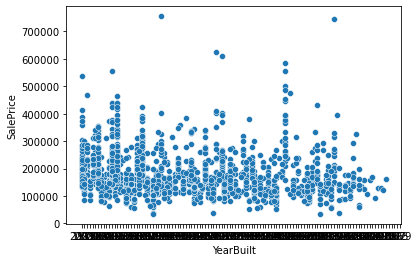

In [48]:
sns.scatterplot(data=all_data_df, x='YearBuilt', y = 'SalePrice')

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

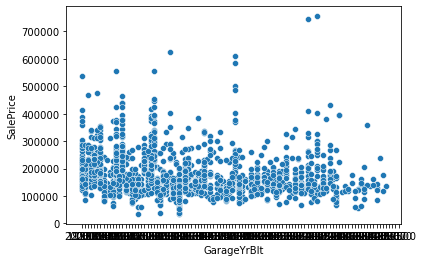

In [49]:
sns.scatterplot(data=all_data_df, x='GarageYrBlt', y = 'SalePrice')

### 모델 성능 측정을 위한 데이터 나누기

In [50]:
all_data_df = pd.get_dummies(all_data_df)
all_data_df.shape

(2919, 547)

In [51]:
preprocessing_df = all_data_df.copy()
preprocessing_y = preprocessing_df.pop('SalePrice')
preprocessing_x = preprocessing_df

In [52]:
preprocessing_train_x = preprocessing_x.iloc[:len(train_df)]
preprocessing_train_y = preprocessing_y.iloc[:len(train_df)]

preprocessing_test_x = preprocessing_x.iloc[len(train_df):]
preprocessing_test_y = preprocessing_y.iloc[len(train_df):]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
split_train_x, split_val_x, split_train_y, split_val_y = train_test_split(preprocessing_train_x, preprocessing_train_y, test_size=0.2, random_state=5)

In [55]:
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor as xgb
from lightgbm import LGBMRegressor as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

### Ridge

In [462]:
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5], 'normalize':[True,False], 'tol':[1e-06,1e-07,1e-08]}
grid_ridge = GridSearchCV(ridge, parameters, cv=5, verbose=1)
grid_ridge.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.1, 0.5],
                         'normalize': [True, False],
                         'tol': [1e-06, 1e-07, 1e-08]},
             verbose=1)

In [463]:
grid_ridge.best_params_

{'alpha': 0.5, 'normalize': True, 'tol': 1e-06}

In [464]:
r2_score(split_val_y,grid_ridge.predict(split_val_x))

0.8650032922119727

In [467]:
np.sqrt(mean_squared_error(split_val_y,grid_ridge.predict(split_val_x)))

29599.485203727414

### DT

In [441]:
param_grid = { 'max_depth' : [7, 15,10, 20, 30] ,
               'max_leaf_nodes' : [None, 5,15,20] ,'min_samples_split' : [10, 15, 20],
              }
            
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = 'neg_mean_squared_error')
grid_dt.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 15, 10, 20, 30],
                         'max_leaf_nodes': [None, 5, 15, 20],
                         'min_samples_split': [10, 15, 20]},
             scoring='neg_mean_squared_error', verbose=1)

In [444]:
grid_dt.best_params_

{'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_split': 20}

In [445]:
r2_score(split_val_y, grid_dt.predict(split_val_x))

0.823833871242447

### XGB

In [56]:
param_grid_xgb = {'learning_rate' :[0.028,0.03,0.032], 'max_depth' : [3,4,5,6], 
          'n_estimators': [150, 160,170],
          #'reg_alpha':[0.4640], 'reg_lambda': [0.8571],
          'subsample': [0.4 ,0.5213, 0.632], 'nthread' :  [-1], 'random_state' : [7]}

In [57]:
model_xgb = xgb()
grid_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=5, verbose=1, n_jobs=-1)


In [58]:
grid_xgb.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.032], 'max_depth': [6],
                         'n_estimators': [170], 'nthread': [-1],
                         'random_state': [7], 'subsample': [0.632]},
             verbose=1)

In [69]:
grid_xgb.best_estimator_.feature_importances_.sum()

1.0

In [74]:
grid_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.032, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=170,
             n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
             random_state=7, reg_alpha=0, ...)

In [449]:
grid_xgb.best_params_

{'learning_rate': 0.028,
 'max_depth': 4,
 'n_estimators': 170,
 'nthread': -1,
 'random_state': 7,
 'subsample': 0.5213}

In [450]:
r2_score(split_val_y, grid_xgb.predict(split_val_x))

0.8931250832470657

## GBD

In [ ]:
gbd_params = {'n_estimators' : [1000, 1500, 2000], 'learning_rate' : [0.02,0.03,0.04], 'max_depth' : [2,3,4], 'max_features' : ['sqrt'],
            'min_samples_leaf' : [15, 20, 25], 'min_samples_split' : [3, 5, 7], 
            'loss' : ['huber'], 'random_state' : [7]
}
gbd = GradientBoostingRegressor()
grid_gbd = GridSearchCV(estimator=gbd, param_grid=gbd_params, cv=5, verbose=1, n_jobs=-1)

In [ ]:
grid_gbd.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.03, 0.04], 'loss': ['huber'],
                         'max_depth': [2, 3, 4], 'max_features': ['sqrt'],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [1000, 1500, 2000],
                         'random_state': [7]},
             verbose=1)

In [ ]:
grid_gbd.best_params_

{'learning_rate': 0.02,
 'loss': 'huber',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 25,
 'min_samples_split': 3,
 'n_estimators': 1000,
 'random_state': 7}

In [ ]:
r2_score(split_test_y, grid_gbd.predict(split_test_x))

0.9089841045085238

### 1. RFE를 통해 feature Selection

### 2. 남은 columns를 분석해서 PCA고려

In [317]:
object_dtype_list = preprocessing_x.dtypes[preprocessing_x.dtypes == 'object'].index.tolist()

### Model

RF

In [382]:
param_grid = { 
    'n_estimators': [100, 200, 300, 350],
    'max_features': [0.8,0.9, 1.0, 'sqrt'],
    'max_depth' : [15, 20, 30, 35],
}

rfr = RandomForestRegressor()
grid_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_rfr.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...max_depth=15, max_features=0.8, n_estimators=100; total time=   1.2s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=100; total time=   1.3s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=100; total time=   1.3s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=100; total time=   1.3s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=100; total time=   1.3s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=200; total time=   2.5s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=200; total time=   2.5s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=200; total time=   2.4s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=200; total time=   2.5s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=200; total time=   2.5s
[CV] END ...max_depth=15, max_features=0.8, n_estimators=300; total time=   3.7s
[CV] END ...max_depth=15, max_features=0.8, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 30, 35],
                         'max_features': [0.8, 0.9, 1.0, 'sqrt'],
                         'n_estimators': [100, 200, 300, 350]},
             verbose=2)

In [383]:
grid_rfr.best_params_

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}

In [384]:
r2_score(split_test_y, grid_rfr.predict(split_test_x))

0.8938704137916927

In [386]:
np.sqrt(mean_squared_error(split_test_y, grid_rfr.predict(split_test_x)))

26551.340671494832

In [397]:
from xgboost import plot_importance

In [403]:
xgb_scores

array([0.90575094, 0.8131809 , 0.90478805, 0.90076193, 0.88749794])

### LGBM

In [452]:
param_grid_lgbm = {'learning_rate' : [0.054, 0.05, 0.055], 'max_depth' : [2,3,4,5], 
                  'n_estimators' : [90, 100,110,200,2200],
                  'subsample' : [0.3, 0.4, 0.5213, 0.632], 
                  'random_state' : [7]
}

In [453]:
lgbm = lgb()
grid_lgb = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, verbose=1, n_jobs=-1)

In [454]:
grid_lgb.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.054, 0.05, 0.055],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [90, 100, 110, 200, 2200],
                         'random_state': [7],
                         'subsample': [0.3, 0.4, 0.5213, 0.632]},
             verbose=1)

In [455]:
grid_lgb.best_params_

{'learning_rate': 0.054,
 'max_depth': 3,
 'n_estimators': 110,
 'random_state': 7,
 'subsample': 0.3}

In [456]:
r2_score(split_test_y, grid_lgb.predict(split_test_x))

0.8919321739356385